# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2020

### Graph functions

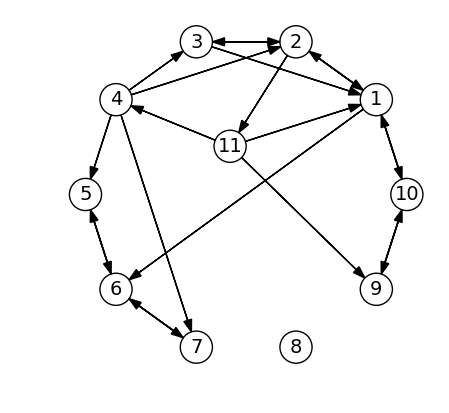

In [6]:
using PyPlot, SparseArrays   # Packages needed

struct Vertex
    neighbors::Vector{Int}
    coordinates::Vector{Float64}
    Vertex(neighbors; coordinates=[0,0]) = new(neighbors, coordinates)
end

function Base.show(io::IO, v::Vertex)
    print(io, "Neighbors = ", v.neighbors)
end

struct Graph
    vertices::Vector{Vertex}
end

function Base.show(io::IO, g::Graph)
    for i = 1:length(g.vertices)
        println(io, "Vertex $i, ", g.vertices[i])
    end
end

function plot_graph(g::Graph; scale=1.0)
    fig, ax = subplots()
    ax.set_aspect("equal")
    
    xmin = minimum(v.coordinates[1] for v in g.vertices)
    xmax = maximum(v.coordinates[1] for v in g.vertices)
    ymin = minimum(v.coordinates[2] for v in g.vertices)
    ymax = maximum(v.coordinates[2] for v in g.vertices)
    sz = max(xmax-xmin, ymax-ymin)
    cr = scale*0.05sz
    hw = cr/2
    axis([xmin-2cr,xmax+2cr,ymin-2cr,ymax+2cr])
    axis("off")

    for i in 1:length(g.vertices)
        c = g.vertices[i].coordinates
        ax.add_artist(matplotlib.patches.Circle(c, cr, facecolor="none", edgecolor="k"))
        ax.text(c[1], c[2], string(i),
                horizontalalignment="center", verticalalignment="center", fontsize=round(Int, 14*scale))
        for nb in g.vertices[i].neighbors
            cnb = g.vertices[nb].coordinates
            dc = cnb .- c
            L = sqrt(sum(dc.^2))
            c1 = c .+ cr/L * dc
            c2 = cnb .- cr/L * dc
            arrow(c1[1], c1[2], c2[1]-c1[1], c2[2]-c1[2],
                  head_width=hw, length_includes_head=true, facecolor="k")
        end
    end
end

function shortest_path_bfs(g::Graph, start, finish)
    parent = zeros(Int64, length(g.vertices))
    S = [start]
    parent[start] = start
    while !isempty(S)
        ivertex = popfirst!(S)
        if ivertex == finish
            break
        end
        for nb in g.vertices[ivertex].neighbors
            if parent[nb] == 0 # Not visited yet
                parent[nb] = ivertex
                push!(S, nb)
            end
        end
    end
    # Build path
    path = Int64[]
    iv = finish
    while true
        pushfirst!(path, iv)
        if iv == start
            break
        end
        iv = parent[iv]
    end
    return path
end

# Example graph from lecture notes
all_neighbors = [[2,10,6], [3,1,11], [1,2], [5,3,2,7], [6],
                 [7,5], [6], Int64[], [10], [1,9], [1,4,9]]
all_coordinates = [[0.81, 0.59], [0.31, 0.95], [-0.31, 0.95], [-0.81, 0.59],
                   [-1.0, 0.0],  [-0.81, -0.59], [-0.31, -0.95], [0.31, -0.95],
                   [0.81, -0.59], [1.0, -0.0], [-0.1, 0.3]]
g = Graph([Vertex(n,coordinates=c) for (n,c) in zip(all_neighbors, all_coordinates)])
plot_graph(g)

### Problem 3 - Word ladder

A *word ladder* is a sequence of words, beginning at `first_word` and ending at `last_word`,
such that

1. Only one letter is changed in each step
2. Each word exists in a given word list

Write a function

```julia
function word_ladder(first_word, last_word)
```

which returns the *shortest* such sequence of words. You can assume that
the sequence exists, if it is not unique you can return any shortest
sequence, and that the lengths of the two given words are equal.
Use the same word list as in homework 8 (that is,
<https://github.com/BenLauwens/ThinkJulia.jl/blob/master/data/words.txt>).

```julia
word_ladder("fool", "sage")
```
```
7-element Array{String,1}:
 "fool"
 "foil"
 "fail"
 "fall"
 "sall"
 "sale"
 "sage"
```


In [11]:
function differByOne(w1,w2)
    # Assuming length(w1) == length(w2) since we filter words.txt before we run this helper function.
    chars1 = [];
    chars2 = [];
    for i = 1:length(w1)
        push!(chars1,w1[i])
        push!(chars2,w2[i])
    end
    equality = [chars1[i]==chars2[i] for i = 1:length(chars1)]
    diffs = [];
    for i = 1:length(equality)
        if equality[i] == false
            push!(diffs,equality[i])
        end
    end
    return length(diffs)==1
end

differByOne (generic function with 1 method)

In [34]:
function word_ladder(first_word,last_word)
    fullWordList = readlines("words.txt");
    lengthrefined = [];
    firstindex = 0;
    lastindex = 0;
    for i = 1:length(fullWordList)
        if length(fullWordList[i])==length(first_word)
            push!(lengthrefined,fullWordList[i])
        end
    end
    for i = 1:length(lengthrefined)
        if lengthrefined[i] == first_word
            firstindex = i;
        end
        if lengthrefined[i] == last_word
            lastindex = i;
        end
    end
    wordneighbors = [];
    wordcoordinates = []; 
    # Since we're not plotting the graph, we just assign enough coordinates so that the struct Vertex 
    # can be defined.
    for i = 1:length(lengthrefined) 
        push!(wordcoordinates,[i,i])
    end
    n = 0;
    for i = 1:length(lengthrefined)
        push!(wordneighbors,Int64[])
        for j = 1:length(lengthrefined)
            if differByOne(lengthrefined[i],lengthrefined[j])
                push!(wordneighbors[i],j)
            end
        end
    end
    wordgraph = Graph([Vertex(n,coordinates = c) for (n,c) in zip(wordneighbors,wordcoordinates)]);
    wordpath = shortest_path_bfs(wordgraph,firstindex,lastindex);
    words_on_path = [lengthrefined[wordindex] for wordindex in wordpath];
end

word_ladder (generic function with 1 method)

In [35]:
# For testing
word_ladder("fool", "sage")

7-element Array{String,1}:
 "fool"
 "foil"
 "fail"
 "fall"
 "sall"
 "sale"
 "sage"